In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("cleaned.csv")

In [5]:
df.head()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720


In [7]:
df.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [11]:
df.shape

(45166, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [15]:
#  statistical summary 
df.describe()

,item_id,user_id,rating,timestamp,year,month,quantity,unitprice,amount
count,45166.000000,4.516600e+04,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000
mean,3455.669574,4.846225e+05,4.218594,42077.370743,2014.710136,6.387902,7.490878,7491.027587,56118.889032
std,2485.219357,3.302487e+05,1.221118,816.969504,2.264562,3.598405,1.707673,1441.977833,16924.053525
min,1.000000,2.800000e+01,1.000000,36692.000000,2000.000000,1.000000,5.000000,5000.000000,25000.000000
25%,1518.000000,1.969772e+05,4.000000,41802.000000,2014.000000,3.000000,6.000000,6239.000000,43098.250000
50%,2881.000000,4.410355e+05,5.000000,42219.000000,2015.000000,6.000000,7.000000,7480.000000,54243.000000
75%,5178.000000,7.579805e+05,5.000000,42594.000000,2016.000000,10.000000,9.000000,8735.000000,67760.000000
max,9551.000000,1.157632e+06,5.000000,43374.000000,2018.000000,12.000000,10.000000,10000.000000,100000.000000


In [17]:
#number of unique users and items
df.nunique()

item_id       1892
user_id      40401
rating           5
timestamp     4179
gender           2
category        10
brand           50
year            19
month           12
quantity         6
unitprice     5001
amount       19611
dtype: int64

In [21]:
# Checking missing values
df.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

<Axes: title={'center': 'Year Wise Sales'}, xlabel='year'>

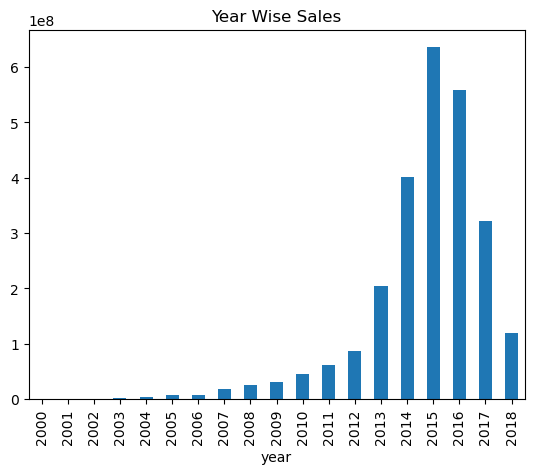

In [23]:
# What was the best year of sales?
# Group by year and sum the sales amount
df.groupby('year')['amount'].sum().plot(kind='bar', title='Year Wise Sales')

<Axes: title={'center': 'Best Month for Sales (2015-2018)'}, xlabel='month'>

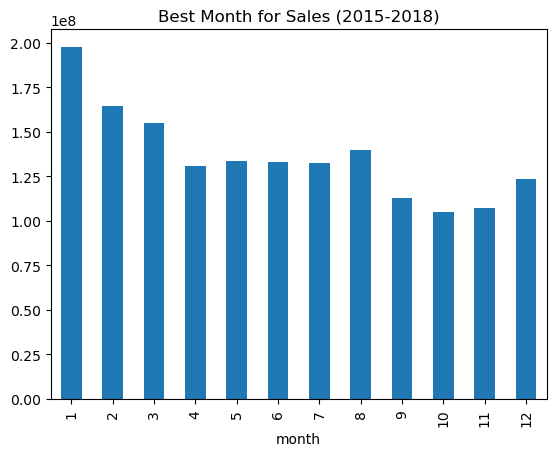

In [25]:
# Which was the best month for sales between 2015 t0 2018
# Filter dataset for years 2015 to 2018
dataset = df[(df['year'] >= 2015) & (df['year'] <= 2018)]

# Group by month and sum the total sales amount
dataset.groupby('month')['amount'].sum().plot(kind='bar', title='Best Month for Sales (2015-2018)')


<Axes: title={'center': 'Brand Wise Top 10 Sales (2015-2018)'}, xlabel='brand'>

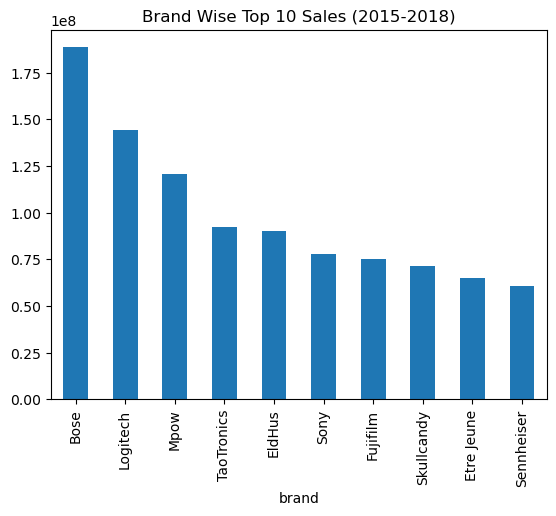

In [33]:
# What brand sold the most in the highest selling year(2015 to 2018)
# Group by brand and sum the total sales amount
top_brands = dataset.groupby('brand')['amount'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 selling brands
top_brands.plot(kind='bar', title='Brand Wise Top 10 Sales (2015-2018)')

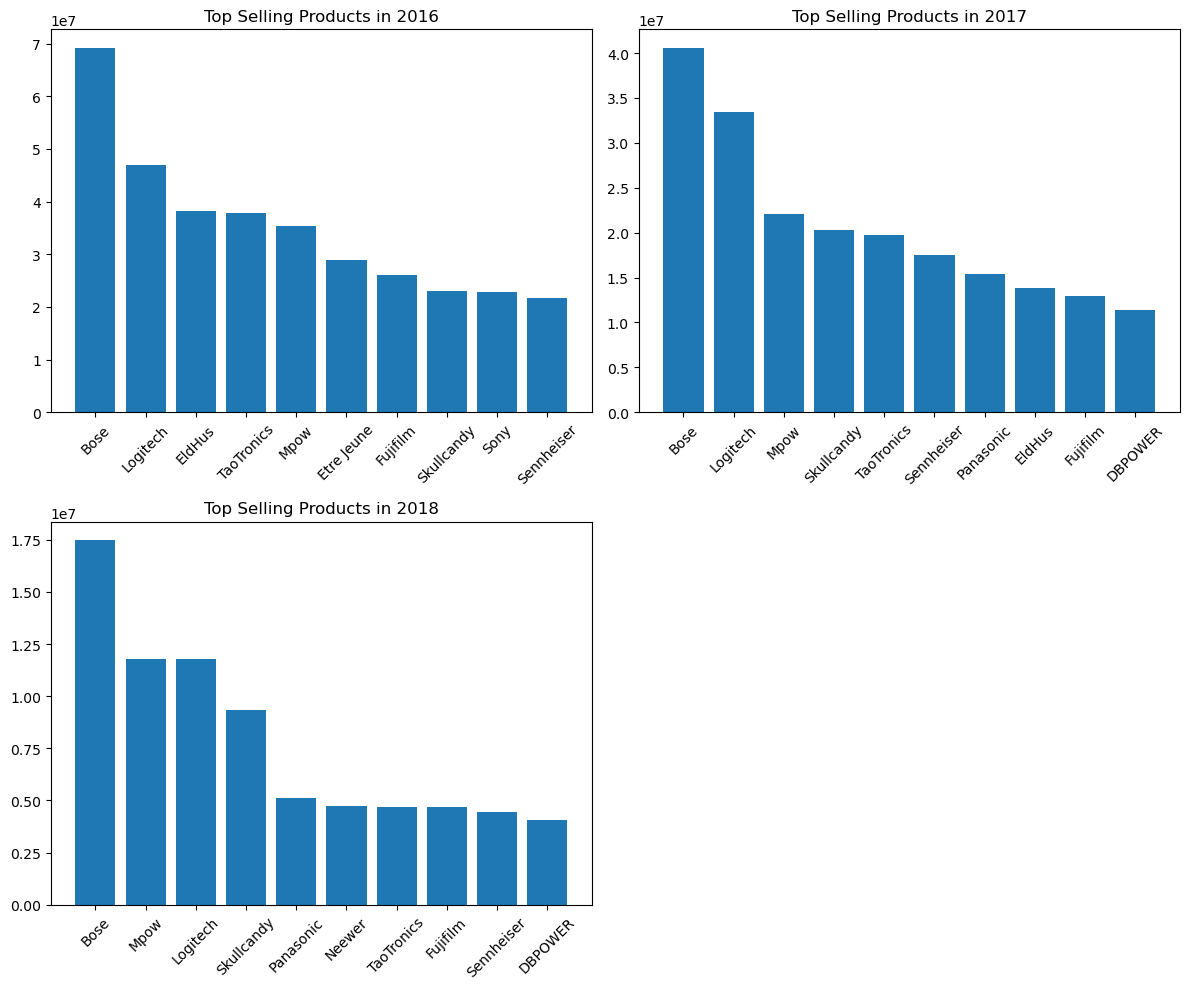

In [35]:
# What products sold the most in the three years 2016, 2017 & 2018
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Function to get top-selling products
def get_top_selling(year):
    return df[df['year'] == year].groupby('brand')['amount'].sum().sort_values(ascending=False).head(10)

# Plot for 2016
top_selling_2016 = get_top_selling(2016)
axs[0, 0].bar(top_selling_2016.index, top_selling_2016)
axs[0, 0].set_title('Top Selling Products in 2016')
axs[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot for 2017
top_selling_2017 = get_top_selling(2017)
axs[0, 1].bar(top_selling_2017.index, top_selling_2017)
axs[0, 1].set_title('Top Selling Products in 2017')
axs[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot for 2018
top_selling_2018 = get_top_selling(2018)
axs[1, 0].bar(top_selling_2018.index, top_selling_2018)
axs[1, 0].set_title('Top Selling Products in 2018')
axs[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Hide the empty subplot
axs[1, 1].axis('off')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()





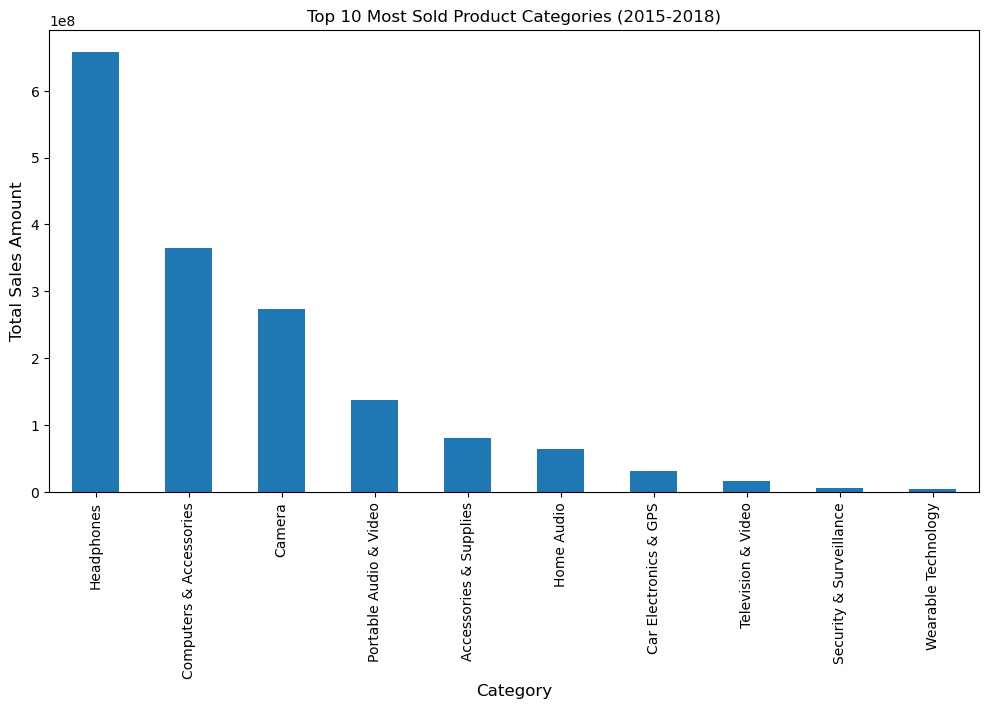

In [45]:
# What product by category sold the most between 2015 to 2018?
# Filter dataset for years 2015 to 2018
dataset = df[(df['year'] >= 2015) & (df['year'] <= 2018)]

# Group by category and sum the total sales amount
top_categories = dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))

# Plot the top 10 product categories
top_categories.plot(kind='bar', title='Top 10 Most Sold Product Categories (2015-2018)')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.show()


<Axes: title={'center': '10 Least Sold Product Brands 2015 to 2018'}, xlabel='brand'>

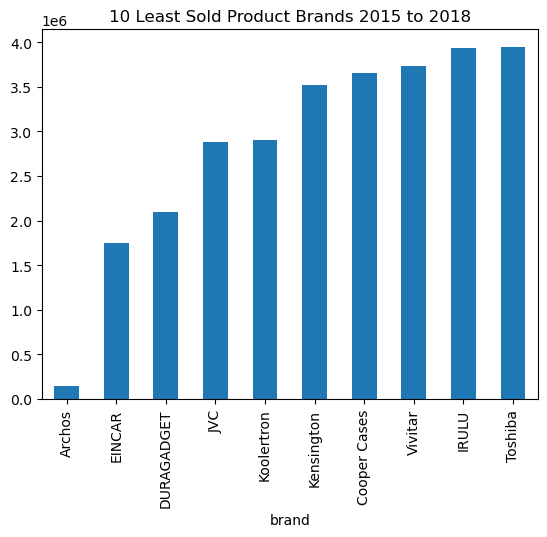

In [51]:
# What product by category sold the least between 2015 to 2018
# Group by brand and sum the amounts, then sort in ascending order and select the 10 least sold brands
dataset.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar', title='10 Least Sold Product Brands 2015 to 2018')


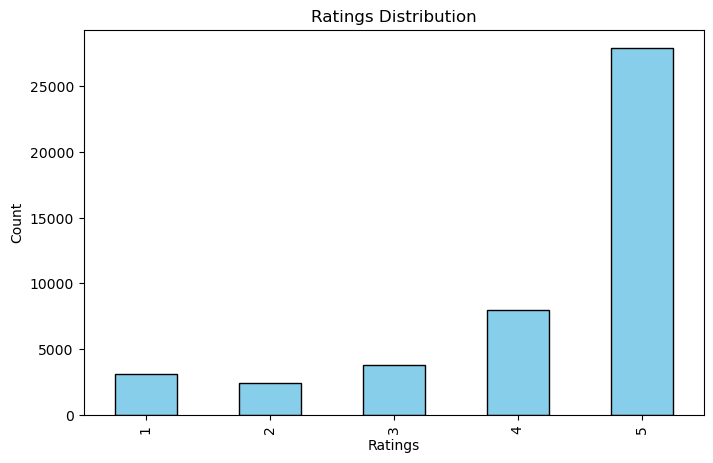

In [59]:
# Ratings Distribution
plt.figure(figsize=(8, 5))
df['rating'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings Distribution')
plt.show()

<Axes: title={'center': '10 most rating Brand 2015 to 2018'}, xlabel='brand'>

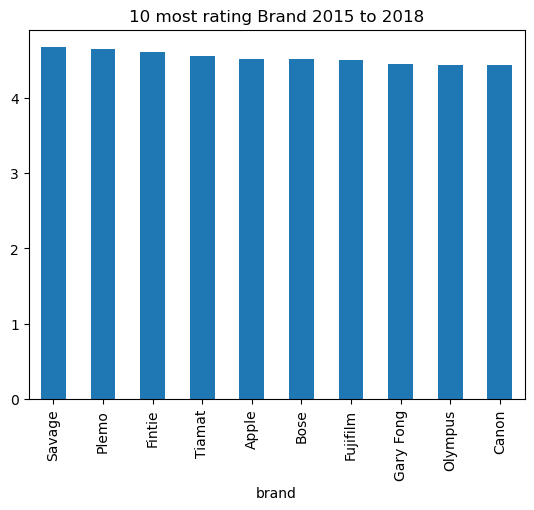

In [63]:
# Best rated brands
dataset.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',title='10 most rating Brand 2015 to 2018')

<Axes: title={'center': 'Top 5 category sales percentage'}, ylabel='amount'>

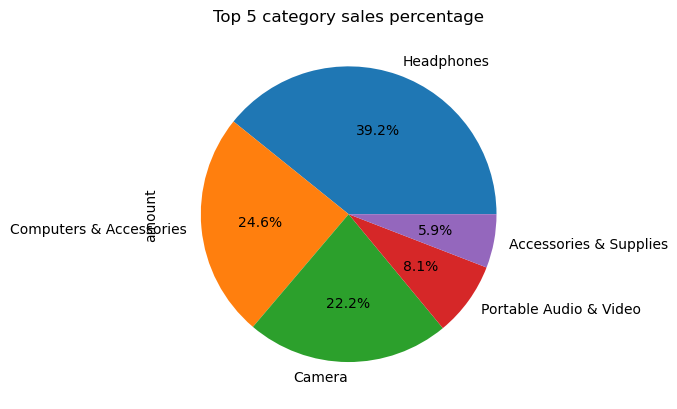

In [65]:
# Top 5 category sales percentage

df.groupby('category')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 category sales percentage')


<Axes: title={'center': 'Top 5 Brand wise salespercentage'}, ylabel='rating'>

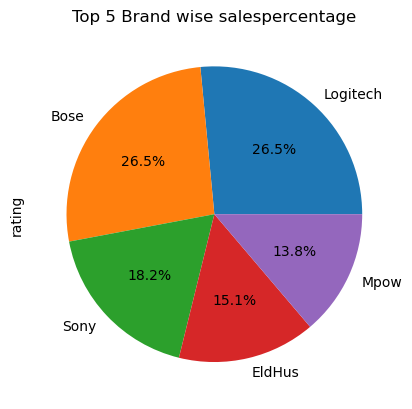

In [67]:
# Brand wise sales percentage
df.groupby('brand')['rating'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 Brand wise salespercentage')

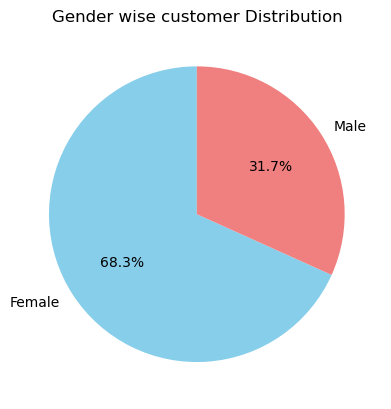

In [71]:
# Gender wise customer distribution
gender_distribution = dataset['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index,autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender wise customer Distribution')
plt.show()